#### Importing all required libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle
import re
import math

#### To display all rows and columns in DF

In [111]:
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 25)

#### Import and view Data

In [144]:
house_df = pd.read_csv(r'Craiglist_HouseData3.csv', index_col=0)
house_df

,Price,Bedroom,Area,Title,Place,Post Timing,Finishing,House Type,Parking Type,Bathroom,Link
1,NaN,NaN,NaN,Semiahmoo Town Centre 7500 sq ft lot,NaN,2020-07-20T19:05:26-0700,unfurnished,apartment,NaN,1,https://vancouver.craigslist.org/rds/reo/d/bla...
2,1324888.0,7,7771.0,** OPEN HOUSE JULY 26 FOR THE BEST PRICED HOME...,Newton,2020-07-25T15:47:15-0700,unfurnished,house,NaN,1,https://vancouver.craigslist.org/rds/reb/d/sur...
3,728000.0,1,547.0,***INVESTOR ALERT - AIRBNB ALLOWED*** Downtow...,Whistler,2020-07-03T22:11:07-0700,unfurnished,apartment,NaN,1,https://vancouver.craigslist.org/van/reb/d/daw...
4,1098800.0,6,547.0,6 bed house with a basement suite in Sullivan ...,Surrey,2020-07-25T14:37:59-0700,unfurnished,apartment,NaN,4.5,https://vancouver.craigslist.org/rds/reb/d/sur...
5,632000.0,2,1305.0,High Level Executive 2 Bedroom Condo in Coquitlam,North Coquitlam,2020-07-25T14:42:39-0700,unfurnished,condo,attached garage,2,https://vancouver.craigslist.org/pml/reb/d/coq...
6,648000.0,1,771.0,Brand New 1 Bed & Den in Award Winning Compass...,402 680 Seylynn Crescent,2020-07-25T14:42:17-0700,unfurnished,condo,attached garage,1,https://vancouver.craigslist.org/van/reb/d/nor...
7,1099000.0,2,11.0,2 Storey Condo in Beautiful Compass in Seylynn,610 680 Seylynn Crescent,2020-07-25T14:41:57-0700,unfurnished,condo,attached garage,2,https://vancouver.craigslist.org/van/reb/d/nor...
8,548000.0,1,560.0,Luxury Living at Kensington Gardens,Vancouver,2020-07-25T14:05:37-0700,unfurnished,condo,attached garage,1,https://vancouver.craigslist.org/van/reb/d/van...
9,599900.0,2,NaN,5 acres & 2400sf House on Quadra Island,Courtenay,2020-07-25T14:11:22-0700,unfurnished,apartment,NaN,1,https://vancouver.craigslist.org/van/reo/d/ref...
10,790000.0,2,617.0,"5058 Joyce, steps to Joyce Skytrain Station, o...",Vancouver Joyce-Collingwood,2020-06-29T11:39:00-0700,unfurnished,condo,NaN,0,https://vancouver.craigslist.org/van/reb/d/van...


In [145]:
"We have {} rows and {} columns scraped from Craigslist".format(house_df.shape[0],house_df.shape[1])

'We have 2788 rows and 11 columns scraped from Craigslist'

#### how many null values do we have in each column ?

In [146]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 1 to 2788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         2600 non-null   float64
 1   Bedroom       2467 non-null   object 
 2   Area          2026 non-null   float64
 3   Title         2788 non-null   object 
 4   Place         2682 non-null   object 
 5   Post Timing   2788 non-null   object 
 6   Finishing     2788 non-null   object 
 7   House Type    2719 non-null   object 
 8   Parking Type  1101 non-null   object 
 9   Bathroom      2784 non-null   object 
 10  Link          2788 non-null   object 
dtypes: float64(2), object(9)
memory usage: 261.4+ KB


#### Remove invalid rows

In [147]:
#-- Remove house rental posts 
house_df.drop(house_df[house_df['Title'].str.contains("rent")].index, inplace=True)
house_df.drop(house_df[house_df['Title'].str.contains("Rent")].index, inplace=True)
#-- Remove Duplicate rows
house_df.drop_duplicates(subset = ["Title", "Area", "Place", "Finishing", "Bedroom","House Type"], inplace=True) 

"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 2388'

In [148]:
#-- Remove land/plot sale posts
house_df.drop(house_df[house_df['House Type']=='land'].index, inplace=True)

land_index = house_df[((house_df['Title'].str.contains("Land") | 
           house_df['Title'].str.contains("land")) & (house_df["Bedroom"].isnull()))].index
house_df.drop(land_index, axis=0, inplace=True)

acre_index = house_df[((house_df['Title'].str.contains("acre") | 
           house_df['Title'].str.contains("Acre")) & (house_df["Bedroom"].isnull()))].index
house_df.drop(acre_index, axis=0, inplace=True)

"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 2243'

#### Handling null values 

In [149]:
# Drop null values and 0 - priced 
house_df.dropna(subset = ["Price"], inplace=True)
house_df = house_df[house_df["Price"]>1]

"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 2084'

#### Remove outliers

In [150]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [151]:
house_df = remove_outlier(house_df, "Price")
house_df = remove_outlier(house_df, "Area")

"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 1386'

In [152]:
print('Bedroom unique values -', house_df['Bedroom'].unique(),'\n')
print('Bathroom unique values -', house_df['Bathroom'].unique(),'\n')
print('House Type -', house_df['House Type'].unique(),'\n')
print('Parking Type -', house_df['Parking Type'].unique(),'\n')
print('Finishing -', house_df['Finishing'].unique(),'\n')

Bedroom unique values - ['1' '6' '2' '4' '3' '5' '8' '7' '0' '9'] 

Bathroom unique values - ['1' '4.5' '2' '0' '3' '3.5' '5' '2.5' '9+' '4' '7' '1.5' '6' '5.5'
 'shared' 'split'] 

House Type - ['apartment' 'condo' 'townhouse' nan 'duplex' 'house'] 

Parking Type - [nan 'attached garage' 'detached garage' 'street parking' 'no parking'] 

Finishing - ['unfurnished' 'furnished'] 



#### House Type

In [153]:
# Considering missing values as a category
house_df["House Type"].fillna("others", inplace=True)

#### Bathroom

In [174]:
"All the categories: '9+', 'shared', 'split', '0'  --- "+ str(house_df[(house_df['Bathroom']== "9+") 
                                                                       |(house_df['Bathroom']== "shared")
                                                                       |(house_df['Bathroom']== "split")
                                                                       |(house_df['Bathroom']=="0")
                                                                       |(house_df['Bathroom']=="4.5")
                                                                       |(house_df['Bathroom']=="5")
                                                                       |(house_df['Bathroom']=="5.5")].shape[0])

25/house_df.shape[0]

0.018037518037518036

In [131]:
#bathroom fillna with groupby(House Type)
house_df['Bathroom'].loc[((house_df['Bathroom']== "9+") 
                         |(house_df['Bathroom']== "shared")
                        |(house_df['Bathroom']== "split")
                         |(house_df['Bathroom']=="0"))] = np.nan
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], downcast='integer')
house_df['Bathroom'].loc[house_df['Bathroom']> 4] = np.nan

D:\ProgramFiles\AnacondaDistribution\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [132]:
house_df.groupby(['House Type'])['Bathroom'].agg(pd.Series.mode)

House Type
apartment    1.0
condo        1.0
duplex       3.5
house        2.0
others       1.0
townhouse    2.0
Name: Bathroom, dtype: float64

In [136]:
house_df['Bathroom'].loc[((house_df['House Type'] == "apartment") |
              (house_df['House Type'] == "condo")|
              (house_df['House Type'] == "others"))& (house_df['Bathroom'].isnull())] = 1
house_df['Bathroom'].loc[((house_df['House Type'] == "townhouse")|
              (house_df['House Type'] == "house"))& (house_df['Bathroom'].isnull())] = 2
house_df['Bathroom'].loc[((house_df['House Type'] == "others")|
              (house_df['House Type'] == "duplex"))& (house_df['Bathroom'].isnull())] = 3.5

D:\ProgramFiles\AnacondaDistribution\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [139]:
house_df['Bathroom'].unique()

array([1. , 2. , 3. , 3.5, 2.5, 4. , 1.5])

In [140]:
house_df["Bathroom"].loc[house_df["Bathroom"]>3] = 4

D:\ProgramFiles\AnacondaDistribution\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [141]:
house_df.groupby("Bathroom").agg([ 'count']).iloc[:,0]

Bathroom
1.0    499
1.5     36
2.0    606
2.5     60
3.0    131
4.0     54
Name: (Price, count), dtype: int64

#### Parking

In [98]:
house_df[house_df['Parking Type'].notnull()].groupby(['House Type','Parking Type']).agg('count').iloc[:,0]

House Type  Parking Type   
apartment   attached garage    229
            detached garage     16
            no parking           6
            street parking      44
condo       attached garage    117
                              ... 
others      no parking           1
            street parking      22
townhouse   attached garage    109
            detached garage     10
            street parking       6
Name: Price, Length: 21, dtype: int64

In [99]:
house_df['Parking Type'].fillna('attached garage', inplace=True)

In [100]:
house_df['Parking Type'].isnull().sum()

0

### Finishing

In [100]:
house_df.rename({'Finishing': 'isFurnished'}, axis=1, inplace=True)  

In [101]:
house_df["isFurnished"].unique()

array(['unfurnished', 'furnished'], dtype=object)

In [102]:
house_df["isFurnished"].replace({'unfurnished':0, 'furnished':1}, inplace=True)

### Bedroom

In [107]:
house_df.groupby(['House Type'])['Bedroom'].agg(pd.Series.mode)

House Type
apartment    2
condo        2
duplex       4
house        4
others       2
townhouse    3
Name: Bedroom, dtype: object

In [108]:
house_df['Bedroom'].loc[((house_df['House Type'] == "apartment") |
              (house_df['House Type'] == "condo")|
              (house_df['House Type'] == "others"))& (house_df['Bedroom'].isnull())] = 2
house_df['Bedroom'].loc[((house_df['House Type'] == "duplex")|
                        (house_df['House Type'] == "townhouse"))& (house_df['Bedroom'].isnull())] = 3
house_df['Bedroom'].loc[((house_df['House Type'] == "house"))& (house_df['Bedroom'].isnull())] = 4

In [109]:
house_df['Bedroom'] = pd.to_numeric(house_df["Bedroom"])
house_df['Bedroom'].loc[house_df[house_df['Bedroom']>5].index] = 6

In [110]:
house_df['Bedroom'].isnull().sum()

0

### Area

In [104]:
house_df['Area'].fillna(house_df.groupby(['House Type', 'Bedroom'])['Area'].transform('mean'), inplace=True)

In [105]:
house_df.drop(house_df[house_df.Area.isnull()].index,inplace=True)

In [106]:
house_df["Area"].isnull().sum()

0

#### Price

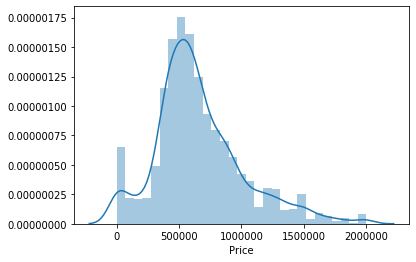

In [103]:
ax = sns.distplot(house_df['Price'])

In [104]:
# normalise the price
house_df["Price"] = np.log(house_df["Price"])

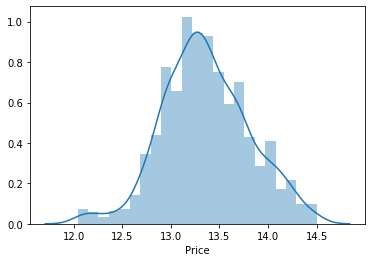

In [109]:
ax = sns.distplot(house_df['Price'])

#### Columns

In [115]:
#-- Remove columns
col_remove = ["Title", "Place", "Post Timing", "Link"]
house_df.drop(col_remove, axis= 1, inplace =True)

In [116]:
house_df.head()#check isfurnished

,Price,Bedroom,Area,isFurnished,House Type,Parking Type,Bathroom
2,13.498,1,547.000,unfurnished,apartment,attached garage,1.000
3,13.910,6,547.000,unfurnished,apartment,attached garage,2.000
4,13.357,2,1305.000,unfurnished,condo,attached garage,2.000
5,13.382,1,771.000,unfurnished,condo,attached garage,1.000
6,13.910,2,11.000,unfurnished,condo,attached garage,2.000


In [117]:
house_df.shape

(1410, 7)

In [118]:
# house_df["reverseLog"] = Z =  np.exp(house_df["logPrice"])

In [119]:
house_df["Bathroom"].unique()

array([1. , 2. , 3. , 4. , 2.5, 1.5])

In [120]:
final_df = pd.get_dummies(house_df, drop_first=True)

In [121]:
final_df.head(20)

,Price,Bedroom,Area,Bathroom,isFurnished_unfurnished,House Type_condo,House Type_duplex,House Type_house,House Type_others,House Type_townhouse,Parking Type_detached garage,Parking Type_no parking,Parking Type_street parking
2,13.498,1,547.000,1.000,1,0,0,0,0,0,0,0,0
3,13.910,6,547.000,2.000,1,0,0,0,0,0,0,0,0
4,13.357,2,1305.000,2.000,1,1,0,0,0,0,0,0,0
5,13.382,1,771.000,1.000,1,1,0,0,0,0,0,0,0
6,13.910,2,11.000,2.000,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,13.815,3,1.000,2.000,1,0,0,0,1,0,0,0,0
34,13.092,2,895.000,1.000,1,0,0,0,0,0,0,0,0
35,13.385,1,533.000,1.000,1,0,0,0,0,0,0,0,0
37,14.122,4,1960.000,4.000,1,0,1,0,0,0,1,0,0


### Linear Regression

In [122]:
X = final_df.iloc[:, 1:]
y = final_df.iloc[:, 0]

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [124]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [125]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [126]:
print(lin_reg.intercept_)

12.866704232616504


In [127]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Bedroom,0.066
Area,0.000
Bathroom,0.137
isFurnished_unfurnished,0.115
House Type_condo,-0.075
...,...
House Type_others,-0.132
House Type_townhouse,-0.104
Parking Type_detached garage,0.028
Parking Type_no parking,-0.042


In [128]:
pred = lin_reg.predict(X_test)

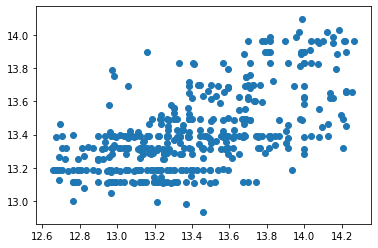

In [129]:
plt.scatter(y_test, pred)

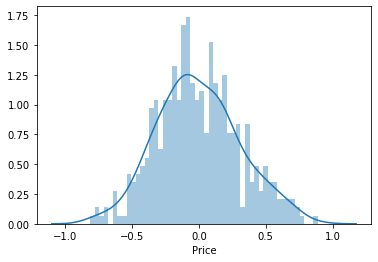

In [130]:
sns.distplot((y_test - pred), bins=50);

In [131]:


print_evaluate(y_test, lin_reg.predict(X_test))



MAE: 0.24806112975033562
MSE: 0.09521600458030872
RMSE: 0.308570906892255
R2 Square 0.382905733500042


In [132]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.248,0.095,0.309,0.383,0.319


In [ ]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X,y)

In [133]:
with open('lin_reg5.pkl','wb') as f:
    pickle.dump(lin_reg,f)

In [134]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))        

seaborn==0.9.0
scikit-learn==0.21.3
pandas==1.0.4
numpy==1.16.5
matplotlib==3.1.1
